##### Abstract—The choice of Activation Functions (AF) has proven to be an important factor that affects the performance of an Artificial Neural Network (ANN). Use a 1-hidden layer neural network model that adapts to the most suitable activation function according to the data-set. The ANN model can learn for itself the best AF to use by exploiting a flexible functional form, k0 + k1 ∗ x with parameters k0, k1 being learned from multiple runs.

##### The network we are building is using Kears and Numpy libraries 
##### The network is only 1 layer ANN model
##### The network is build on MNIST Data set 

##### We will first build the model using the numpy libraries

In [1]:
#importing the data set 
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [2]:
#Basic data check on shape 
print("The shape of dataset ",mnist['data'].shape)
print("The shape of target dataset",mnist['target'].shape)

The shape of dataset  (70000, 784)
The shape of target dataset (70000,)


In [4]:
#View of data
mnist['data'][0]
mnist['target'][69999]

9.0

In [5]:
## Importing Numpy and matplot libraries
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
#lets split the data of mnist (data,target)
X = mnist["data"]
y = mnist["target"]

In [7]:
#normalise the data 
X = X/255

In [8]:
# we will encode the MNIST labels using one hot encoding 
digits = 10
y_data = y.shape[0]
y = y.reshape(1, y_data)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, y_data)

In [9]:
#shape of newly create dataset for y
print(Y_new.shape)

(10, 70000)


In [10]:
#shape of data which is normalize
print(X.shape)

(70000, 784)


In [11]:
#we will split the data set and also we will shuffle it
#np.random.permutation(10)
#array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6])
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

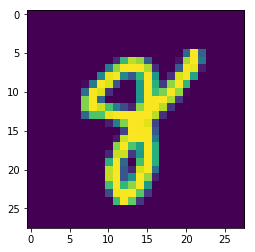

In [12]:
#let verfiy the data by plotting to see evrything hold correctly
ith_data_pont = 12
plt.imshow(X_train[:,ith_data_pont].reshape(28,28))
plt.show()

In [13]:
#to verfiy the same data point in the labled data
Y_train[:,ith_data_pont]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [14]:
#lets define the cost function, multi class log loss, cross entropy
def compute_multiclass_loss(Y, Y_hat):
    #lets write the formula here to compute the log loss
    Loss_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    #now let us consider the all data points and divide
    m = Y.shape[1]
    Loss = -(1/m)*Loss_sum
    
    return Loss

In [15]:
print(X_train.shape)
print(Y_train.shape)

(784, 60000)
(10, 60000)


In [16]:
#Now we will build and train the model
#We will have one layer as said that is of 64 units, and we will define a constant learning rate of 1
n_inputs = X_train.shape[0]
n_hidden = 64
learning_rate = 1

#intialization of weights and baisas
#np.random.randn np.random.randn(64,784).shape == (64, 784)

W1 = np.random.randn(n_hidden,n_inputs)
b1 = np.zeros((n_hidden,1))


#inialization of wegihts and baisas at output layer
#np.random.randn(10,60000).shape == (10,60000)

W2 = np.random.randn(digits, n_hidden)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

In [17]:
#lets define a sigmoid function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [18]:
#lets run a for loop for 2000 iteration(2000 epoch)
keep_cost = []
for i in range(2000):
    
    #Activation function, sigmoid function
    Z1 = np.matmul(W1, X)+b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1)+b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
    
    #compute the loss function
    cost = compute_multiclass_loss(Y, A2)
    
    #Upadte the weights, by finding the derivatives
    
    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    
    if (i % 100 == 0):
        keep_cost.append(cost)
        print("Epoch", i, "cost: ", cost)
        

print("Final cost:", cost)

Epoch 0 cost:  6.201542529801034
Epoch 100 cost:  0.7586632913818451
Epoch 200 cost:  0.5713841549500944
Epoch 300 cost:  0.4910009994674983
Epoch 400 cost:  0.4426820493376492
Epoch 500 cost:  0.4091403955778295
Epoch 600 cost:  0.3838298327130884
Epoch 700 cost:  0.3636652860668509
Epoch 800 cost:  0.3470296284524116
Epoch 900 cost:  0.33293914860308216
Epoch 1000 cost:  0.3207327468081413
Epoch 1100 cost:  0.3099645118280535
Epoch 1200 cost:  0.3003321013193894
Epoch 1300 cost:  0.2916247958658094
Epoch 1400 cost:  0.283690463684207
Epoch 1500 cost:  0.2764149314109147
Epoch 1600 cost:  0.2697085714064211
Epoch 1700 cost:  0.2634980335105284
Epoch 1800 cost:  0.25772175012169823
Epoch 1900 cost:  0.25232740129052633
Final cost: 0.24731947596315218


In [19]:
def plt_dynamic(x, cost, ax, colors=['b']):
    ax.plot(x, cost, 'b', label="Train loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

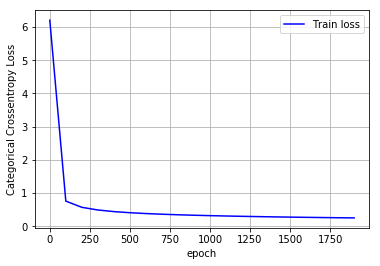

In [20]:
#Plot the graph epoch vs loss
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
#list of epoch numbers
x = list(range(0,2000,100))

#print(history.history.keys())
cost = keep_cost

plt_dynamic(x, cost, ax)

In [21]:
# Now lets see how did we perform on the network which we build up
# we will take the updated weights
# metrics such as precision    recall  f1-score 
from sklearn.metrics import confusion_matrix,classification_report

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 955    0   10    4    1   12   13    5    9    6]
 [   0 1108    3    2    5    2    4    6    4    4]
 [   2    2  941   20    6    8    7   32   15    3]
 [   3    7   12  912    2   28    0    4   30   13]
 [   0    0    8    1  911    4   13    5    7   47]
 [   7    0    4   20    2  784   17    2   16    4]
 [   9    3   16    3   10   14  894    0   15    3]
 [   3    2   11   18    5    8    4  945   11   22]
 [   1   12   26   25    6   22    6    2  854   14]
 [   0    1    1    5   34   10    0   27   13  893]]
             precision    recall  f1-score   support

          0       0.97      0.94      0.96      1015
          1       0.98      0.97      0.97      1138
          2       0.91      0.91      0.91      1036
          3       0.90      0.90      0.90      1011
          4       0.93      0.91      0.92       996
          5       0.88      0.92      0.90       856
          6       0.93      0.92      0.93       967
          7       0.92      0.92      0.92  

##### we will try to build the same network using mini batch gradient descent  
##### we will use momentum+graident descent 
##### we will change the way of initalization from random normal to smarter initialization.

In [23]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# import
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

# scale
X = X / 255

# one-hot encode labels
digits = 10
y_data = y.shape[0]
y = y.reshape(1, y_data)
Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, y_data)

# split, reshape, shuffle
m = 60000
m_test = X.shape[0] - m
X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

In [24]:
## we will define all the utility functions here
## Sigmoid function to calculate the sigmoid of the data at given point
## We will compute the categorical loss considering mutliclass
## we will define our feed forward network
## We will define our back propogation netwrok

## Here we are updating using dictonary{key:value}

def sigmoid(z):
    s = 1. / (1. + np.exp(-z))
    return s

def compute_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L

def feed_forward(X, params):

    cache = {}

    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]
    cache["A1"] = sigmoid(cache["Z1"])
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache

def back_propagate(X, Y, params, cache):

    dZ2 = cache["A2"] - Y
    dW2 = (1./m_batch) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1./m_batch) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))
    dW1 = (1./m_batch) * np.matmul(dZ1, X.T)
    db1 = (1./m_batch) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads

In [25]:
### Now we will define all the parameters here
### the number of hidden layers
### the number of units in the hidden layer
### initialisation of the weights and biases
### number of epochs
### batch size
### learning rate
### since we are using momentum + GD we will define a parameter beta

n_inputs = X_train.shape[0]
n_hidden = 64
learning_rate = 4
beta = .9
batch_size = 128
batches = -(-m // batch_size)
keep_test = []
keep_train = []

# initialization
params = { "W1": np.random.randn(n_hidden, n_inputs) * np.sqrt(1. / n_inputs),
           "b1": np.zeros((n_hidden, 1)) * np.sqrt(1. / n_inputs),
           "W2": np.random.randn(digits, n_hidden) * np.sqrt(1. / n_hidden),
           "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_hidden) }

V_dW1 = np.zeros(params["W1"].shape)
V_db1 = np.zeros(params["b1"].shape)
V_dW2 = np.zeros(params["W2"].shape)
V_db2 = np.zeros(params["b2"].shape)

# train
for i in range(9):

    permutation = np.random.permutation(X_train.shape[1])
    X_train_shuffled = X_train[:, permutation]
    Y_train_shuffled = Y_train[:, permutation]

    for j in range(batches):

        begin = j * batch_size
        end = min(begin + batch_size, X_train.shape[1] - 1)
        X = X_train_shuffled[:, begin:end]
        Y = Y_train_shuffled[:, begin:end]
        m_batch = end - begin

        cache = feed_forward(X, params)
        grads = back_propagate(X, Y, params, cache)

        V_dW1 = (beta * V_dW1 + (1. - beta) * grads["dW1"])
        V_db1 = (beta * V_db1 + (1. - beta) * grads["db1"])
        V_dW2 = (beta * V_dW2 + (1. - beta) * grads["dW2"])
        V_db2 = (beta * V_db2 + (1. - beta) * grads["db2"])

        params["W1"] = params["W1"] - learning_rate * V_dW1
        params["b1"] = params["b1"] - learning_rate * V_db1
        params["W2"] = params["W2"] - learning_rate * V_dW2
        params["b2"] = params["b2"] - learning_rate * V_db2

    cache = feed_forward(X_train, params)
    train_cost = compute_loss(Y_train, cache["A2"])
    cache = feed_forward(X_test, params)
    test_cost = compute_loss(Y_test, cache["A2"])
    keep_train.append(train_cost)
    keep_test.append(test_cost)
    print("Epoch {}: traing cost = {}, test cost = {}".format(i+1 ,train_cost, test_cost))

print("Done.")

Epoch 1: traing cost = 0.15866839487761608, test cost = 0.1635872781963415
Epoch 2: traing cost = 0.09969811584412969, test cost = 0.11041205136093807
Epoch 3: traing cost = 0.0814434268243597, test cost = 0.1016097287656573
Epoch 4: traing cost = 0.062399481445807294, test cost = 0.09456419173108928
Epoch 5: traing cost = 0.0546109939835294, test cost = 0.08982311032575171
Epoch 6: traing cost = 0.04378092614203725, test cost = 0.08216910973127357
Epoch 7: traing cost = 0.04347141790998355, test cost = 0.09147654029498646
Epoch 8: traing cost = 0.0324295259506281, test cost = 0.08497678138180462
Epoch 9: traing cost = 0.025072575421196477, test cost = 0.08049882198658984
Done.


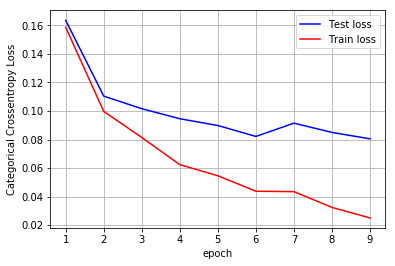

In [26]:
#Plot epoch vs loss
def plt_dynamic(x, te, tr, ax, colors=['b']):
    ax.plot(x, te, 'b', label="Test loss")
    ax.plot(x, tr, 'r', label="Train loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()
    
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1,9+1))

#print(history.history.keys())
te = keep_test
tr = keep_train
plt_dynamic(x, te, tr, ax)

In [27]:
## Metrics precision recall f1-score

cache = feed_forward(X_test, params)
predictions = np.argmax(cache["A2"], axis=0)
labels = np.argmax(Y_test, axis=0)

print(classification_report(predictions, labels))

             precision    recall  f1-score   support

          0       0.99      0.97      0.98       994
          1       0.99      0.99      0.99      1134
          2       0.98      0.98      0.98      1025
          3       0.98      0.95      0.97      1043
          4       0.97      0.96      0.97       988
          5       0.97      0.97      0.97       896
          6       0.96      0.98      0.97       939
          7       0.97      0.98      0.97      1016
          8       0.96      0.98      0.97       956
          9       0.97      0.97      0.97      1009

avg / total       0.97      0.97      0.97     10000



# USING KERAS

In [28]:
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.datasets import mnist
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal

C:\Users\SACHEEN\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
C:\Users\SACHEEN\Anaconda3\lib\site-packages\requests\__init__.py:80: RequestsDependencyWarning: urllib3 (1.25.9) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [30]:
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation loss")
    ax.plot(x, ty, 'r', label="Train loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [31]:
# the data, shuffled and split between train and test sets
(X_train, y_train),(X_test, y_test)= mnist.load_data()

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

 # after converting the input images from 3d to 2d vectors
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)
Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [32]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255
X_train = X_train/255
X_test = X_test/255

In [33]:
#here we are having class number for each image 
print("Class label of first image : ", y_train[0])

#lets convert this into 10 dimension vector 
#ex :  consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test,10)

# this conversion needed for MLPs 
print("After converting the output into a vector : ",Y_train[0])

Class label of first image :  5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Softmax classifier

In [34]:
# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:
# model = Sequential([
# Dense(32, input_shape=(784,)),
# Activation('relu'),
# Dense(10),
# Activation('softmax'),
# ])
# there are many activation functions ar available ex: tanh, relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128
nb_epoch = 20

#start building the model

model = Sequential()
# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input
# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


##### Before training a model, you need to configure the learning process, which is done via the compile method . It receives three arguments .An optimizer. This could be the string identifier of an existing optimizer . A loss function. This is the objective that the model will try to minimize.A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']

In [35]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,Y_test))

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 2s 29us/sample - loss: 1.2995 - acc: 0.6847 - val_loss: 0.8186 - val_acc: 0.8278
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.7215 - acc: 0.8380 - val_loss: 0.6101 - val_acc: 0.8614
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.5895 - acc: 0.8595 - val_loss: 0.5270 - val_acc: 0.8737
Epoch 4/20
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5265 - acc: 0.8691 - val_loss: 0.4802 - val_acc: 0.8808
Epoch 5/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4883 - acc: 0.8760 - val_loss: 0.4496 - val_acc: 0.8863
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.4621 - acc: 0.8805 - val_loss: 0.4287 - val_acc: 0.8890
Epoch 7/20
60000/60000 [==============================] - 1s 23us/sa

Test Score 0.33507866705656053
Test Accuracy 0.9087


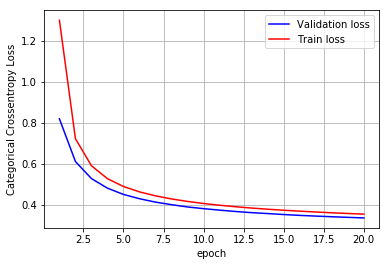

In [36]:
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Score", score[0])
print("Test Accuracy", score[1])

fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')

#list of epoch numbers
x = list(range(1,nb_epoch+1))

#print(history.history.keys())
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)